<img src='img/Screen Shot 2021-10-28 at 1.12.39 AM.png'>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

In [2]:
O = np.array([[25,30,25],[30,71,19],[35,49,16]])
df_observed = pd.DataFrame(O, index=['A','B','C'])
df_observed.columns = ['21-40','41-60','61-80']
df_observed

,21-40,41-60,61-80
A,25,30,25
B,30,71,19
C,35,49,16


In [3]:
statistic, p_value, degree_of_freedom, expected = stats.chi2_contingency(O)
print('Statistic : ', statistic)
print('p Value : ', p_value)

Statistic :  13.315833333333334
p Value :  0.009831372848336144


$$
\displaystyle
\chi^2_{df}=\sum_{i=1}^{n_i}\sum_{j=1}^{n_j}\frac{(O_{ij}-E_{ij})^2}{E_{ij}},\quad df=(n_i-1)(n_j-1)
$$

In [7]:
degree_of_freedom = (O.shape[0] - 1) * (O.shape[1] - 1)
degree_of_freedom

4

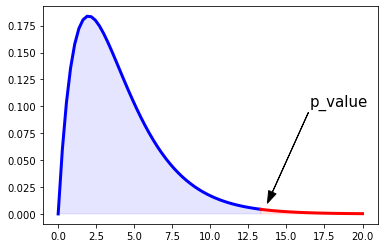

In [10]:
fig, ax = plt.subplots()

x = np.linspace(0, statistic) 
y = stats.chi2(degree_of_freedom).pdf(x)
ax.plot(x, y, color='b', linewidth=3)

x = np.concatenate([[0], x, [statistic], [0]])
y = np.concatenate([[0], y, [0], [0]])
ax.fill(x, y, color='b', alpha=0.1)

x = np.linspace(statistic, 20, 100)
y = stats.chi2(degree_of_freedom).pdf(x) 
ax.plot(x, y, color='r', linewidth=3)

x = np.concatenate([[statistic], x, [20], [statistic]])
y = np.concatenate([[0], y, [0], [0]])
ax.fill(x, y, color='r', alpha=0.1)

xy = ((12.5 + 15.0) / 2, 0.01)
xytext = (16.5, 0.10)
arrowprops = dict(color='k', width=0.2, headwidth=8)
ax.annotate('p_value', xy, xytext=xytext, fontsize=15, arrowprops=arrowprops);

# Reference

[Understandable_Statistics](https://www.youtube.com/watch?v=RvGb5L_A16w&list=PL4BztsgicSEeC4Oic6s5vW4LE-0YZTuo-&index=18&t=0s)

[scipy.stats.chi2_contingency](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html)